In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
from tensorflow.python.keras.applications.vgg16 import VGG16

In [3]:
#loading VGG16 model
model=VGG16()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

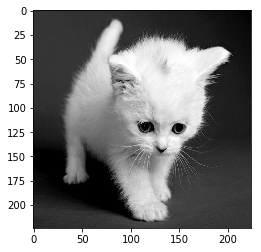

In [85]:
#Open Image, resize and convert to numpy
image=cv2.imread("1.jpg",cv2.IMREAD_COLOR)
image=cv2.resize(image,(224,224))
image=np.array(image)
plt.imshow(image)

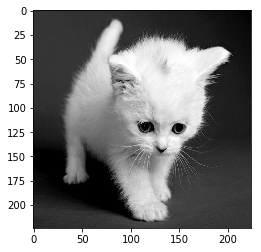

In [87]:
# Blue-Green-red pallete - to classic RGB
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [27]:
#we need it to optimize image for proessing with VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
image = preprocess_input(image.astype('float32'))


In [28]:
#Add image to the batch of one
X=[]
X.append(image)
X=np.array(X)
X.shape

(1, 224, 224, 3)

In [81]:
#For convinience, lets wrap all preprocessing into one function, that preproesses picture and returns batch of one
from tensorflow.keras.applications.vgg16 import preprocess_input
def prep_im(path,shape):
    image=cv2.imread(path,cv2.IMREAD_COLOR)
    image=cv2.resize(image,shape)
    image=np.array(image)
    image = preprocess_input(image.astype('float32'))
    X=[]
    X.append(image)
    X=np.array(X)
    return X
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


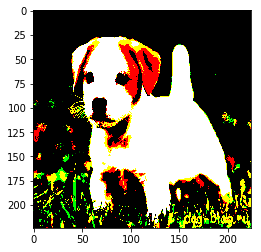

In [72]:
X=prep_im("doggy.jpg",(100,100))
plt.imshow(X[0])

In [90]:
prediction=model.predict(X)

In [91]:
prediction.shape

(1, 1000)

In [30]:
from tensorflow.keras.applications.vgg16 import decode_predictions
label=decode_predictions(prediction)
label

[[('n03770679', 'minivan', 0.2439771),
  ('n03594945', 'jeep', 0.19443537),
  ('n03769881', 'minibus', 0.14065905),
  ('n02930766', 'cab', 0.07825183),
  ('n03977966', 'police_van', 0.049833044)]]

#=======================================================================================================

#=======================================================================================================

#=======================================================================================================

In [42]:
import numpy as np

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from matplotlib import pyplot as plt


In [50]:
X_train,X_test,y_train,y_test=np.load("cats_dogs.np.npy")

In [51]:
X_train_prep=np.array([preprocess_input(p.astype('float32')) for p in X_train])
X_test_prep=np.array([preprocess_input(p.astype('float32')) for p in X_test])

In [52]:
feature_extractor=VGG16(weights='imagenet',
                        include_top=False,
                        input_shape=(100,100,3))

feature_extractor.trainable=False
feature_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [54]:
mymodel=Sequential()

mymodel.add(feature_extractor)
mymodel.add(Flatten())
mymodel.add(Dense(512, activation='relu'))
mymodel.add(Dense(256,activation='relu'))
mymodel.add(Dense(1,activation='sigmoid'))

mymodel.compile(loss='binary_crossentropy',
               optimizer='adam')

mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 17,206,081
Trainable params: 2,491,393
Non-trainable params: 14,714,688
_________________________________________________________________


In [55]:
%%time
batch_size=64
mymodel.fit(X_train_prep,y_train,
         batch_size=batch_size,
          epochs=5, validation_split=0.1)

Train on 810 samples, validate on 90 samples
Epoch 1/5
810/810 [==============================] - 30s 38ms/step - loss: 2.7977 - val_loss: 5.6511
Epoch 2/5
810/810 [==============================] - 16s 20ms/step - loss: 1.8230 - val_loss: 2.3090
Epoch 3/5
810/810 [==============================] - 16s 20ms/step - loss: 1.3607 - val_loss: 2.9771
Epoch 4/5
810/810 [==============================] - 16s 20ms/step - loss: 1.2147 - val_loss: 1.9563
Epoch 5/5
810/810 [==============================] - 16s 20ms/step - loss: 1.0807 - val_loss: 2.3087
Wall time: 1min 35s


In [56]:
prediction=mymodel.predict(X_test_prep).astype('int')

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction,y_test)

0.92

In [19]:
(prediction[:,0].astype('int'))

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [20]:
pred_labels=["cat" if p==0 else "dog" for p in prediction[:,0]]

true_labels=["cat" if p==0 else "dog" for p in y_test]

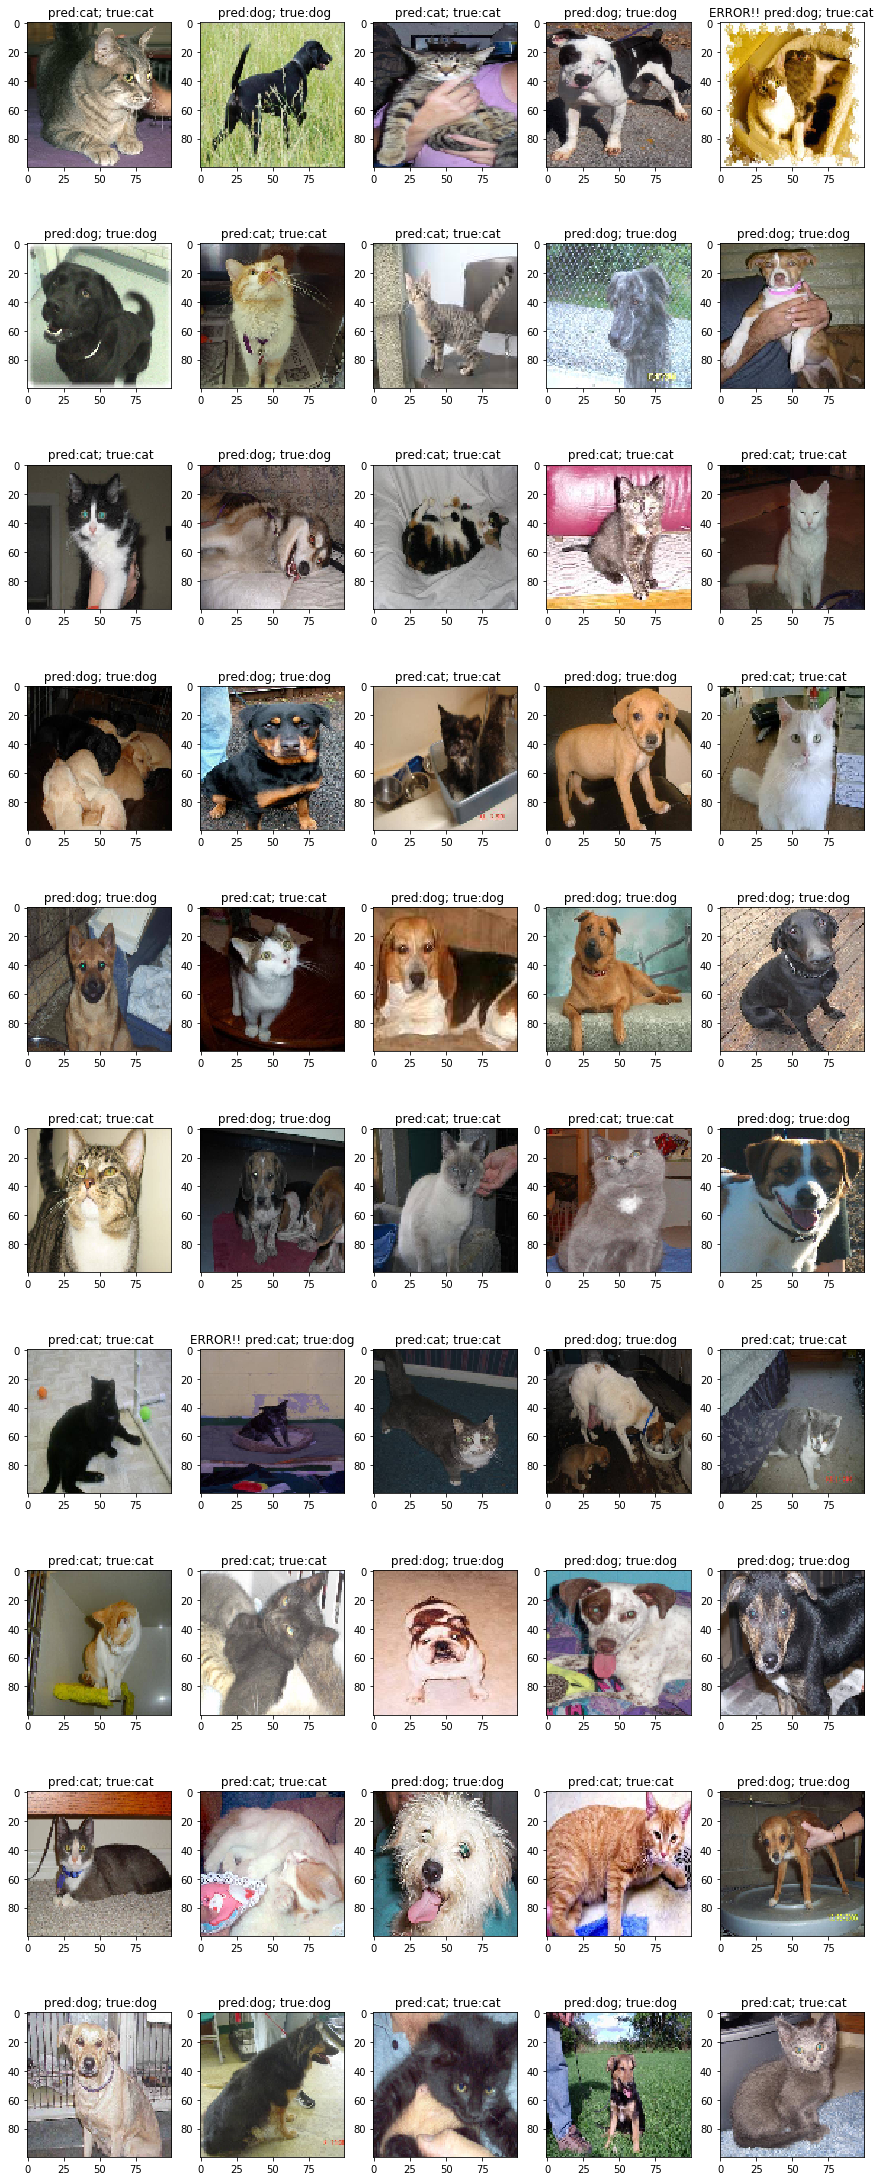

In [21]:
fig,axes=plt.subplots(nrows=10,ncols=5,figsize=(15,40))


for i in range(50):
    if pred_labels[i]!=true_labels[i]:
        e="ERROR!!" 
    else: e=""
    axes[i//5,i%5].imshow(X_test[i])
    axes[i//5,i%5].set_title(e+" pred:"+pred_labels[i]+"; true:"+true_labels[i])
    
plt.show()

In [82]:
x=prep_im("doggy.jpg",(100,100))

In [83]:
mymodel.predict(x)

array([[1.]], dtype=float32)